# Back propagation from Scratch for training XOR gate

In [720]:
import numpy as np
import matplotlib.pyplot as plt

### activation functions

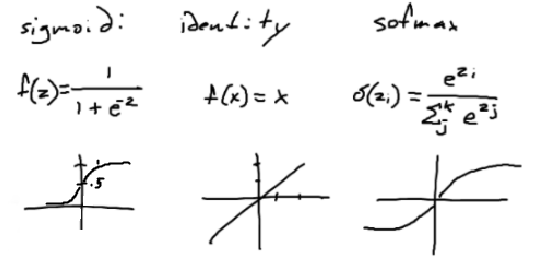
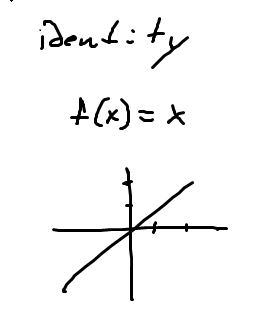
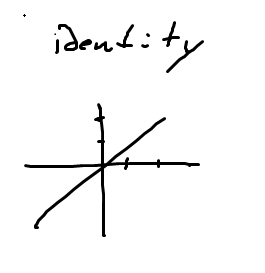
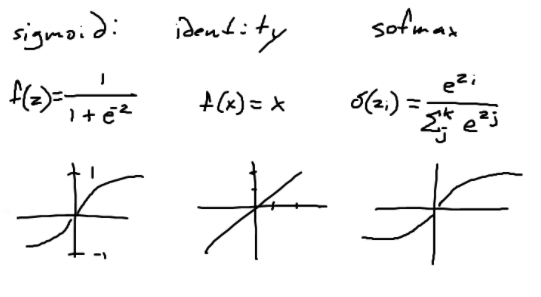
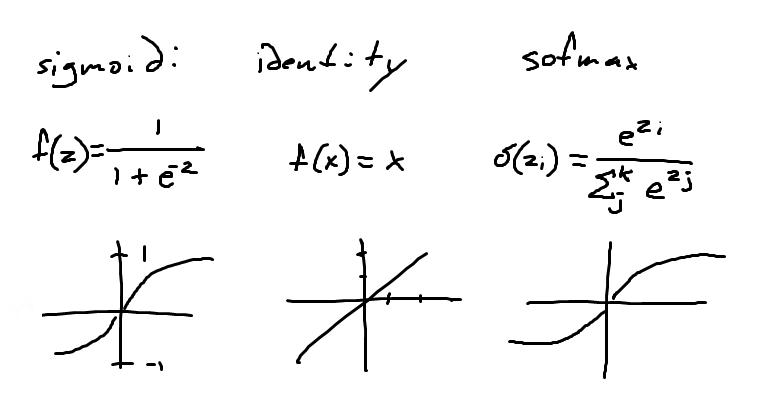
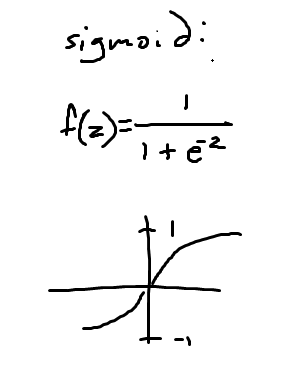
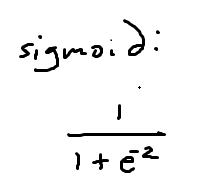

In [786]:
def identity(z):
    return z

def identity_dx(z):
    return z

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_dx(z):
    return sigmoid(z) * (1 - sigmoid(z))  # for matrix, * is element wise (hadamard product)

def softmax(z):
    return z / np.sum(np.exp(z))

### layers 

2 layer example

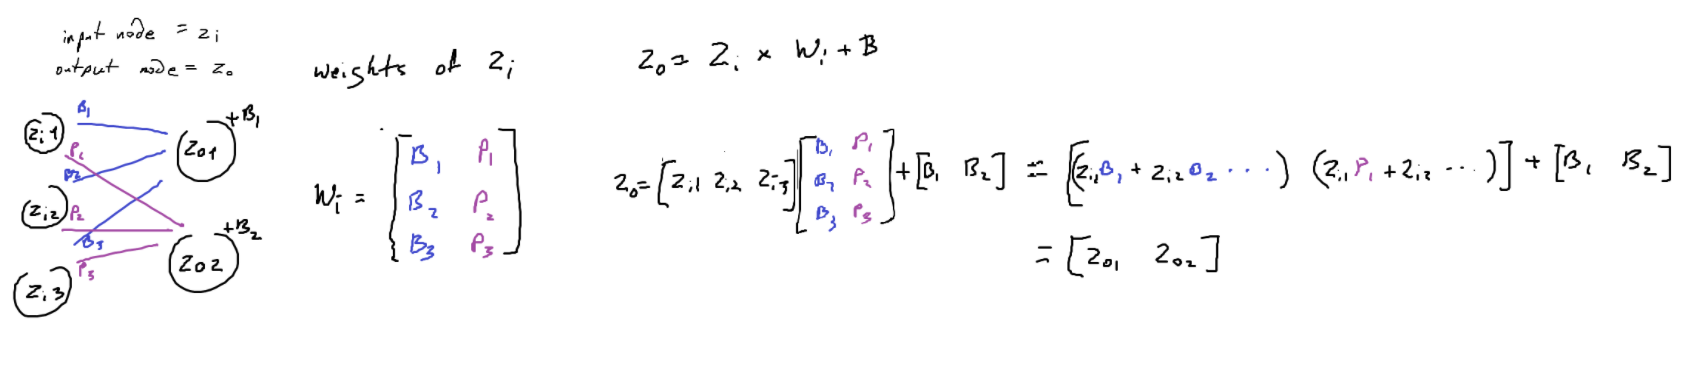
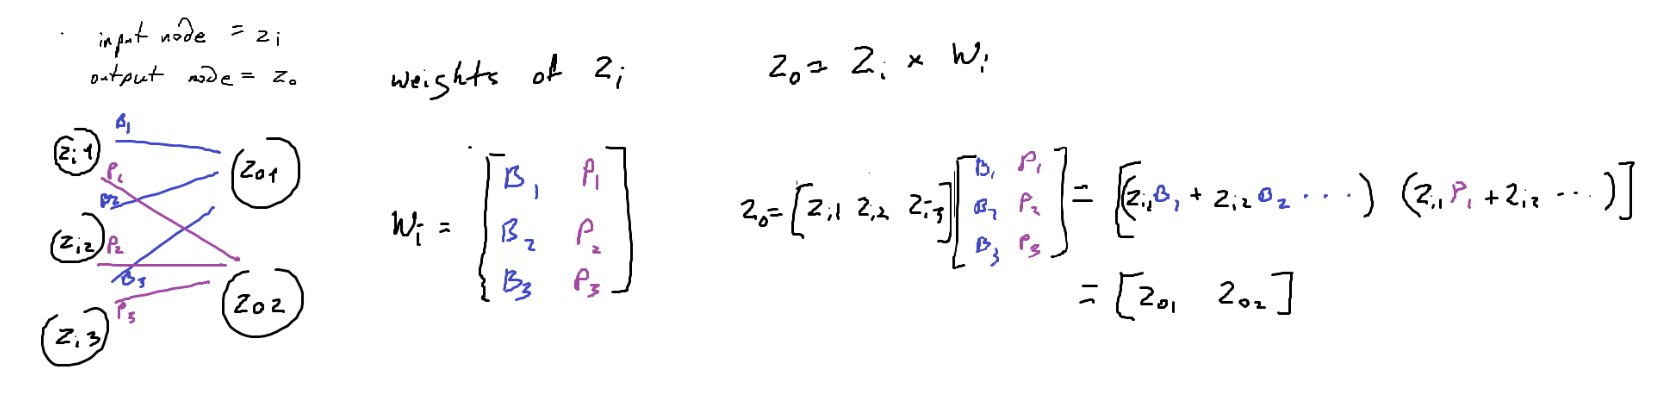
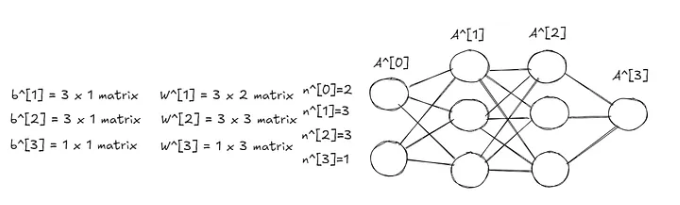

In [787]:
    n = [2, 2, 1] # layer dimensions (we only have fully connected type)
    f = [None, sigmoid, sigmoid] # activation functions
    f_dx = [None, sigmoid_dx, sigmoid_dx]
    
    W = []
    b = []
    Z = [None] * len(n) # outputs at each layer
    A = [None] * len(n) # outputs after activation

    # intermediates for backprop
    d_ = [None] * (len(n)+1) 

    # new values
    Wn = [None] * (len(n))
    bn = [None] * (len(n))

In [788]:
def initialize():
    np.random.seed(6969)
    global W
    global b

    W = [None]
    b = [None]
    
    for i in range(len(n)-1):
        weight = np.random.rand(n[i], n[i+1])
        W.append(weight)
        
        bias = np.random.rand(n[i+1], 1)
        b.append(bias)
        print(i, weight.shape, bias.shape)

### Cost and loss
* loss is the error of our prediction
* cost is the scalar of individual loss
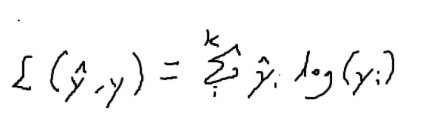
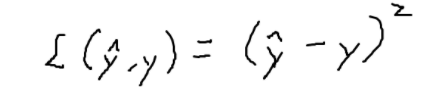
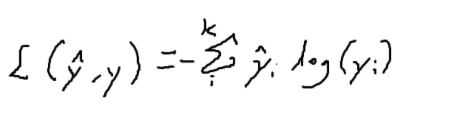

### MSE

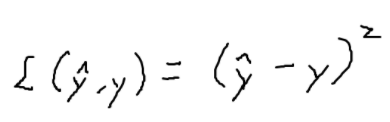

In [789]:
def MSE_1(gt, pred):
    return (gt - pred) ** 2

def MSE(gt, pred):
    return np.average(MSE_1(gt, pred))
    
def MSE_dx(gt, pred):
    return -2 * (gt - pred)

def MSECost(gt, pred):
    l = MSE_1(gt, pred)
    return (1 / l.shape[0]) * np.sum(l)

### Categorical Cross Entropy - not used here

In [790]:
def crossEntropyLoss_1(gt, pred):
    return gt @ np.ln(pred)

def crossEntropyLoss(gt, pred):
    return np.sum(crossEntropyLoss(gt, pred))

def crossEntropyCost(gt, pred): 
    l = crossEntropyLoss_1(gt, pred)
    return (1 / l.shape[0]) * np.sum(l)

### Forward propagation

In [791]:
def forward(x):
    A[0] = x
    for i in range(1, len(A)):
        Z[i] = W[i].T @ A[i-1] + b[i]
        A[i] = f[i](Z[i])

    return A[-1]

### Back propagation

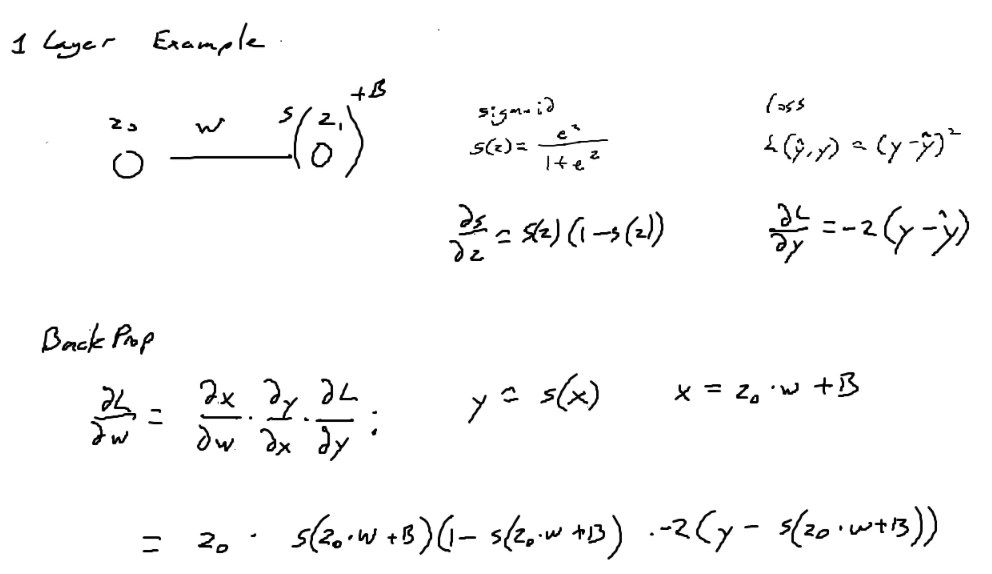
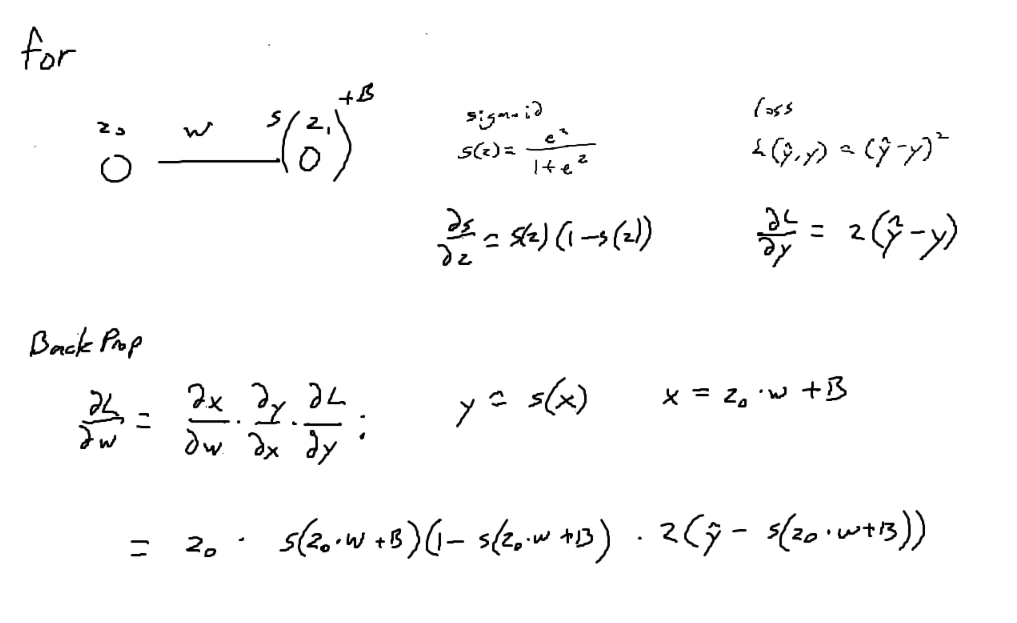

In [801]:
def backward(gt):
    d_[len(A)] = loss_dx(gt, A[-1])

    for i in range(len(A)-1, 0, -1):
        d_[i] = f_dx[i](Z[i]) * d_[i+1]
        
        Wn[i] = W[i] - (lr * A[i-1] @ d_[i].T)
        bn[i] = np.average(b[i] - (lr * d_[i]), axis=1, keepdims=True)
        
        d_[i] = W[i] @ d_[i]
        
    return Wn, bn

### Gradient Descent

batch: updates weights after all samples

stochastic: updates weights every sample

In [818]:
def batchGradientDescent():
    global W
    global b
    for i in range(epoch):
        y = forward(x.T)
        W, b = backward(gt.T)
        l_hist.append(loss(gt, y.T)) 

In [819]:
def stochasticGradientDescent():
    global W
    global b
    for i in range(epoch):
        lacc = 0
        for j in range(len(x)):
            y = forward(np.vstack(x[j]))
            W, b = backward(gt[j])
            lacc += loss(gt[j], y) 
        l_hist.append(lacc / 4)

### XOR dataset

In [802]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
gt = np.array([[0],
              [1],
              [1],
              [0]])

### Net configuration and hyperparams

In [836]:
loss = MSE
loss_dx = MSE_dx

lr = 0.1
epoch = 10000
l_hist = []

initialize()

0 (2, 2) (2, 1)
1 (2, 1) (1, 1)


In [837]:
print(W)
print(b)

[None, array([[0.90778746, 0.02226607],
       [0.42943218, 0.30438451]]), array([[0.74523766],
       [0.88416302]])]
[None, array([[0.6351356 ],
       [0.53867276]]), array([[0.96144443]])]


### Training

In [838]:
#stochasticGradientDescent()
batchGradientDescent()

0.006476743227525934


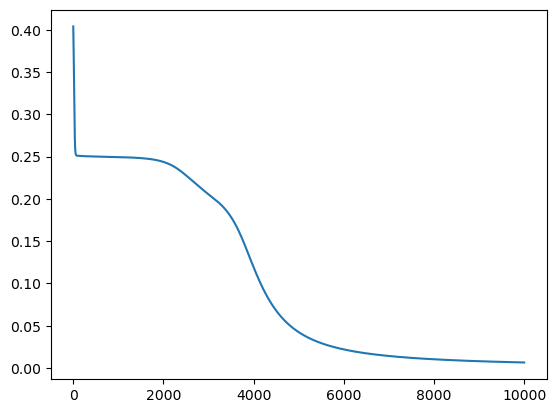

In [839]:
plt.plot(l_hist)
print(l_hist[-1])

In [840]:
print(W)
print(b)

[None, array([[ 7.29358968, -5.93545137],
       [-6.75521694,  6.61523718]]), array([[-5.57332611],
       [-5.60571087]])]
[None, array([[3.05889024],
       [2.56785469]]), array([[8.06266729]])]


In [841]:
forward(x.T)

array([[0.07819273, 0.91073006, 0.90910176, 0.05963525]])